In [4]:
import numpy as np
import pandas as pd
import re
from dateutil import parser
from sklearn.preprocessing import LabelEncoder

In [1]:
df = pd.read_excel('C:/Users/Sujoy.Mukherjee/Python/StandAllocation/BEG.xlsx')

NameError: name 'pd' is not defined

In [9]:
df.shape
df


,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination
0,SWISS1,SWISS1,2018-12-30 13:30:00,2019-01-02 11:00:00,A14-3,A14-3,525,HBVWM,2018-12-30 13:54:00,2019-01-02 10:54:00,LIN,LIN
1,JU171,JU216,2018-12-31 12:25:00,2019-01-01 00:20:00,B3,B3,AT7,YUALO,2018-12-31 12:17:00,2019-01-01 00:20:00,TGD,TIA
2,SWISS1,SWISS2,2018-12-31 13:00:00,2019-01-02 14:00:00,A14-1,A14-1,PC12,HBFVO,2018-12-31 13:19:00,2019-01-02 14:15:00,QLS,QLS
3,JU123,JU610,2018-12-31 16:10:00,2019-01-01 06:50:00,C9,C9,AT7,YUALP,2018-12-31 15:45:00,2019-01-01 06:50:00,SOF,PRG
4,JU523,JU170,2018-12-31 16:45:00,2019-01-01 06:55:00,C10,C10,AT7,YUALN,2018-12-31 16:40:00,2019-01-01 06:58:00,SKG,TGD
5,WZZ4210,WZZ4205,2018-12-31 17:10:00,2019-01-01 06:15:00,A8,A8,320,HALWO,2018-12-31 17:02:00,2019-01-01 06:05:00,MMX,GOT
6,WZZ4052,WZZ4045,2018-12-31 19:55:00,2019-01-01 12:35:00,A9,A9,320,HALPJ,2018-12-31 20:35:00,2019-01-01 12:35:00,MLH,BVA
7,OS737,OS738,2018-12-31 21:30:00,2019-01-01 07:50:00,A3,A3,DH4,OELGI,2018-12-31 21:23:00,2019-01-01 07:45:00,VIE,VIE
8,JU535,JU810,2018-12-31 22:00:00,2019-01-01 07:55:00,C6,C6,319,YUAPB,2018-12-31 21:51:00,2019-01-01 07:50:00,FCO,TLV
9,JU345,JU370,2018-12-31 22:10:00,2019-01-01 06:50:00,C5,C5,319,YUAPJ,2018-12-31 22:01:00,2019-01-01 06:50:00,STR,ZRH


In [5]:
from datetime import date, datetime, timedelta

def perdelta(start, end, delta):
    curr = start
    while curr <= end:
        yield curr
        curr += delta

dtfmt = '%Y-%m-%d'

start = '2019-01-01'
end = '2019-03-31'

sdate = datetime.strptime(start,dtfmt)
edate = datetime.strptime(end,dtfmt)

df_train = pd.DataFrame()
df_valid = pd.DataFrame()

date = sdate
while date <= edate:
    s = date
    e = date + timedelta(days=5)
    e1 = date + timedelta(days=6)
    df_tr = df[(df['sta'] >= s) & (df['sta'] < e)]
    df_va = df[(df['sta'] >= e) & (df['sta'] < e1)]
    df_train = pd.concat([df_train, df_tr], ignore_index=True)
    df_valid = pd.concat([df_valid, df_va], ignore_index=True)
    date = e1    
    
df_test = df[(df['sta'] >= '2019-04-01') & (df['sta'] < '2019-04-30')]
df_result = df[(df['sta'] >= '2019-04-01') & (df['sta'] < '2019-04-30')]

In [6]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)

(4876, 12)
(997, 12)
(2324, 12)


In [7]:
def get_IATA_ICAO(input_id):
    """
    Convenience function to get the the company from the flight ID

    (some of them are described with 3 characters, some of them with 2).

    """

    regex_split = re.match(r"([a-zA-Z]+)([0-9]+)", input_id)

    if regex_split:
        tentative_company = regex_split.group(1)

        # Some of the companies are described with 2 characters, one of them being numerical
        # in which case the regex would not work
        if len(tentative_company) >= 2:
            return tentative_company
        else:
            return input_id[:2]
    else:
        return input_id[:2]
    
def get_minutes(time):
    """
    Get a string in datetime-ish format and calculate the 'minute of the day'
    """

    parsed_time = parser.parse(time)
    return 60 * parsed_time.hour + parsed_time.minute

def get_month(time):
    return parser.parse(time).month


def engineer_features(df):
    
    features = ['ARR_Airline', 'AC_TYPE', 'Origin', 'Destination', 'STA_Weekday', 'STA_time_of_the_day',
                'STA_Month',  'STD_Weekday', 'STD_time_of_the_day', 'STD_Month','Registration', 'log_TTA_Hours', 
                 'Route', 'Arr_Stand']
    
    df['ARR_Airline'] = df['arr'].apply(get_IATA_ICAO)
    df['Route'] = df['arr'] + df['dep']
    df['AC_TYPE'] = df['actype']
    
    df['TTA_Hours'] = (df['std'] - df['sta']).dt.seconds/3600
    df['log_TTA_Hours'] = np.log(df.TTA_Hours+1)
        
    df['sta'] = df['sta'].astype(str) 
    df['STA_Weekday'] = df['sta'].apply(lambda sta: parser.parse(sta).weekday())
    df['STA_time_of_the_day'] = df['sta'].apply(get_minutes)
    df['STA_Month'] = df['sta'].apply(lambda time: parser.parse(time).month)
    
    df['std'] = df['std'].astype(str)
    df['STD_Weekday'] = df['std'].apply(lambda sta: parser.parse(sta).weekday())
    df['STD_time_of_the_day'] = df['std'].apply(get_minutes)
    df['STD_Month'] = df['std'].apply(lambda time: parser.parse(time).month)
    
    df['Registration'] = df['reg']
    df['Arr_Stand'] = df['ArrStand']
    
    return(df[features])

def encoder(df):
    
    ac_type_encoder = LabelEncoder()
    ac_type_encoder.fit(df['AC_TYPE'].apply(lambda x: str(x)))
    df['AC_TYPE'] = ac_type_encoder.transform(
        df['AC_TYPE'].apply(lambda x: str(x)))
    
    airline_encoder = LabelEncoder()
    airline_encoder.fit(df['ARR_Airline'])
    df['ARR_Airline'] = airline_encoder.transform(df['ARR_Airline'])
    
    city_encoder = LabelEncoder()
    city_encoder.fit(df['Origin'])
    df['Origin'] = city_encoder.transform(df['Origin'])
    city_encoder.fit(df['Destination'])
    df['Destination'] = city_encoder.transform(df['Destination'])
    
    registration_encoder = LabelEncoder()
    registration_encoder.fit(df['Registration'])
    df['Registration'] = registration_encoder.transform(df['Registration'])
    
    route_encoder = LabelEncoder()
    route_encoder.fit(df['Route'])
    df['Route'] = route_encoder.transform(df['Route'])
    
    return(df)

In [8]:
df_train = df_train.fillna(0)
df_valid = df_valid.fillna(0)
df_test = df_test.fillna(0)

df_train = engineer_features(df_train)
df_valid = engineer_features(df_valid)
df_test = engineer_features(df_test)

df_train = encoder(df_train)
df_valid = encoder(df_valid)
df_test = encoder(df_test)

In [9]:
import pickle
import numpy as np
import pandas as pd
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


features = [ # 'Registration', 
                'AC_TYPE', 'ARR_Airline',   'log_TTA_Hours',  'STA_time_of_the_day',  
                'Destination', 'Origin', 'STA_Weekday',   'STA_Month' , #'Delay_Flag',
                'Route']


x_train = df_train[features].get_values()
y_train = df_train['Arr_Stand'].apply(lambda x: str(x)).get_values()

x_valid = df_valid[features].get_values()
y_valid = df_valid['Arr_Stand'].apply(lambda x: str(x)).get_values()

x_test = df_test[features].get_values()
y_test = df_test['Arr_Stand'].apply(lambda x: str(x)).get_values()

model = RandomForestClassifier(min_samples_leaf=5, max_depth=10, n_estimators=50)


model.fit(x_train, y_train)

print('Train Accuracy:')
print(round(accuracy_score(model.predict(x_train), y_train),2))
print('Valid Accuracy:')
print(round(accuracy_score(model.predict(x_valid), y_valid),2))
print('Test Accuracy:')
print(round(accuracy_score(model.predict(x_test), y_test),2))

first_recommendations_train_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_train])

first_recommendations_train_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_train])
diff_first_recommendations_train_3 = [(y_train[i] in first_recommendations_train_3[i]) for i in range(len(y_train))]
diff_first_recommendations_train_5 = [(y_train[i] in first_recommendations_train_5[i]) for i in range(len(y_train))]

accuracy_of_first_recommendations_train_3 = np.sum(diff_first_recommendations_train_3)/len(y_train)
accuracy_of_first_recommendations_train_5 = np.sum(diff_first_recommendations_train_5)/len(y_train)

first_recommendations_valid_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_valid])

first_recommendations_valid_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_valid])
diff_first_recommendations_valid_3 = [(y_valid[i] in first_recommendations_valid_3[i]) for i in range(len(y_valid))]
diff_first_recommendations_valid_5 = [(y_valid[i] in first_recommendations_valid_5[i]) for i in range(len(y_valid))]

accuracy_of_first_recommendations_valid_3 = np.sum(diff_first_recommendations_valid_3)/len(y_valid)
accuracy_of_first_recommendations_valid_5 = np.sum(diff_first_recommendations_valid_5)/len(y_valid)


first_recommendations_test_3 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-3::][::-1]]
                                                         for i in x_test])

first_recommendations_test_5 = np.array([model.classes_[np.argsort(model.predict_proba([i])[0])[-5::][::-1]]
                                                         for i in x_test])
diff_first_recommendations_test_3 = [(y_test[i] in first_recommendations_test_3[i]) for i in range(len(y_test))]
diff_first_recommendations_test_5 = [(y_test[i] in first_recommendations_test_5[i]) for i in range(len(y_test))]

accuracy_of_first_recommendations_test_3 = np.sum(diff_first_recommendations_test_3)/len(y_test)
accuracy_of_first_recommendations_test_5 = np.sum(diff_first_recommendations_test_5)/len(y_test)

tr3acc = round(accuracy_of_first_recommendations_train_3,2)
va3acc = round(accuracy_of_first_recommendations_valid_3,2)
te3acc = round(accuracy_of_first_recommendations_test_3,2)

print('Train Accuracy: Best 3')
print(tr3acc)
print('Valid Accuracy: Best 3')
print(va3acc)
print('Test Accuracy: Best 3')
print(te3acc)

print('Train Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_train_5,2))
print('Valid Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_valid_5,2))
print('Test Accuracy: Best 5')
print(round(accuracy_of_first_recommendations_test_5,2))   


C:\Users\ankit.rathi.XSCORP\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Train Accuracy:
0.44
Valid Accuracy:
0.09
Test Accuracy:
0.08
Train Accuracy: Best 3
0.78
Valid Accuracy: Best 3
0.24
Test Accuracy: Best 3
0.25
Train Accuracy: Best 5
0.92
Valid Accuracy: Best 5
0.39
Test Accuracy: Best 5
0.41


In [10]:
df_test = df_test.reset_index(drop=True)
df_result = df_result.reset_index(drop=True)

df_test1 = df_test[features]

probs = model.predict_proba(df_test1.get_values())

best = np.argsort(-probs)

results = []
for i,row in enumerate(best):

    results.append([[stand, "{:6.2f}%".format(prob*100)] for stand, prob
                    in zip(model.classes_[row[0:3]], probs[i][row[0:3]])])

results = pd.DataFrame(results, columns=["Prediction_A", "Prediction_B", "Prediction_C"])

df_result = df_result.join(results)


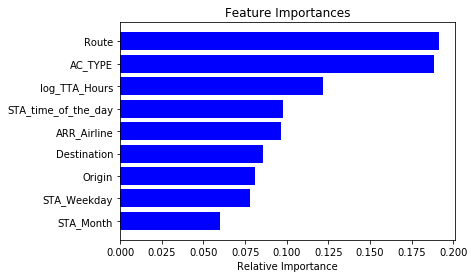

In [11]:
importances = model.feature_importances_ 
indices = np.argsort(importances)

import matplotlib.pyplot as plt
%matplotlib inline 

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [12]:
# display the relative importance of each attribute
importances = model.feature_importances_
#Sort it
print ("Sorted Feature Importance:")
sorted_feature_importance = sorted(zip(importances, features), reverse=True)
print (sorted_feature_importance)

Sorted Feature Importance:
[(0.1914163290549118, 'Route'), (0.18859525285851444, 'AC_TYPE'), (0.12171482076824985, 'log_TTA_Hours'), (0.09793658941132627, 'STA_time_of_the_day'), (0.09623311090522847, 'ARR_Airline'), (0.08573957213941677, 'Destination'), (0.08078544776356131, 'Origin'), (0.07789622641724668, 'STA_Weekday'), (0.059682650681544464, 'STA_Month')]


In [13]:
df_result

,arr,dep,sta,std,ArrStand,DepStand,actype,reg,ata,atd,Origin,Destination,Prediction_A,Prediction_B,Prediction_C
0,JU167,JU190,2019-04-01 05:35:00,2019-04-01 07:35:00,C8,C8,AT7,YUALT,2019-04-01 05:24:00,2019-04-01 07:30:00,SKP,LJU,"[A2, 15.57%]","[C2, 9.03%]","[A13-3, 8.32%]"
1,JU647,JU560,2019-04-01 05:40:00,2019-04-01 07:05:00,C10,C10,AT7,YUALP,2019-04-01 05:07:00,2019-04-01 07:00:00,OTP,VCE,"[C2, 7.43%]","[A2, 7.29%]","[A5, 5.52%]"
2,JU217,JU610,2019-04-01 05:45:00,2019-04-01 06:50:00,C9,C9,AT7,YUALU,2019-04-01 05:11:00,2019-04-01 06:50:00,TIA,PRG,"[C2, 8.86%]","[C3, 6.97%]","[A5, 5.81%]"
3,JU507,JU300,2019-04-01 05:50:00,2019-04-01 06:45:00,C1,C1,319,YUAPI,2019-04-01 05:36:00,2019-04-01 07:00:00,LCA,BRU,"[C3, 16.08%]","[C1, 15.20%]","[C2, 15.12%]"
4,JU827,JU370,2019-04-01 05:50:00,2019-04-01 07:20:00,A3,A3,319,YUAPB,2019-04-01 05:40:00,2019-04-01 07:20:00,BEY,ZRH,"[C2, 12.53%]","[C3, 10.76%]","[C1, 10.19%]"
5,OS771,OS772,2019-04-01 07:30:00,2019-04-01 08:10:00,A5,A5,DH4,OELGA,2019-04-01 07:36:00,2019-04-01 08:10:00,VIE,VIE,"[C8, 19.20%]","[C7, 13.42%]","[C10, 7.62%]"
6,ISLE1,ISLE1,2019-04-01 07:30:00,2019-04-01 08:30:00,A13-2,A13-2,525,MOLLY,2019-04-01 07:50:00,2019-04-01 08:55:00,FMM,SPU,"[A3, 9.35%]","[C2, 8.94%]","[A13-3, 8.20%]"
7,NJE697Q,NJE650M,2019-04-01 07:50:00,2019-04-01 19:30:00,A12-4,A12-4,56X,CSDXF,2019-04-01 09:31:00,2019-04-01 22:00:00,ZAG,ZAG,"[A13-3, 11.35%]","[C6, 8.19%]","[A13-2, 5.23%]"
8,YM100,YM101,2019-04-01 08:15:00,2019-04-01 08:55:00,A1,A1,E95,4OAOC,2019-04-01 08:08:00,2019-04-01 08:50:00,TGD,TGD,"[C7, 16.10%]","[C8, 14.90%]","[C9, 9.28%]"
9,YM200,YM201,2019-04-01 08:15:00,2019-04-01 08:55:00,A2,A2,100,4OAOM,2019-04-01 08:12:00,2019-04-01 08:50:00,TIV,TIV,"[A3, 14.30%]","[C3, 12.22%]","[C1, 10.88%]"


In [14]:
pred=[]
for i in range(df_result.shape[0]):
    arr = [df_result.Prediction_A[i][0],df_result.Prediction_B[i][0],df_result.Prediction_C[i][0]]
    pred.append(arr)   
    
df_pred =pd.DataFrame()
df_pred['pred'] = pred

df_pred['act'] = df_result['ArrStand']
df_pred['flag'] = df_pred.apply(lambda row: 1 if row.act in row.pred else 0, axis=1)


df_feat = df_result[['arr','dep','sta','std','actype','reg']]
df_pred = pd.concat([df_feat, df_pred], axis=1)
df_pred

,arr,dep,sta,std,actype,reg,pred,act,flag
0,JU167,JU190,2019-04-01 05:35:00,2019-04-01 07:35:00,AT7,YUALT,"[A2, C2, A13-3]",C8,0
1,JU647,JU560,2019-04-01 05:40:00,2019-04-01 07:05:00,AT7,YUALP,"[C2, A2, A5]",C10,0
2,JU217,JU610,2019-04-01 05:45:00,2019-04-01 06:50:00,AT7,YUALU,"[C2, C3, A5]",C9,0
3,JU507,JU300,2019-04-01 05:50:00,2019-04-01 06:45:00,319,YUAPI,"[C3, C1, C2]",C1,1
4,JU827,JU370,2019-04-01 05:50:00,2019-04-01 07:20:00,319,YUAPB,"[C2, C3, C1]",A3,0
5,OS771,OS772,2019-04-01 07:30:00,2019-04-01 08:10:00,DH4,OELGA,"[C8, C7, C10]",A5,0
6,ISLE1,ISLE1,2019-04-01 07:30:00,2019-04-01 08:30:00,525,MOLLY,"[A3, C2, A13-3]",A13-2,0
7,NJE697Q,NJE650M,2019-04-01 07:50:00,2019-04-01 19:30:00,56X,CSDXF,"[A13-3, C6, A13-2]",A12-4,0
8,YM100,YM101,2019-04-01 08:15:00,2019-04-01 08:55:00,E95,4OAOC,"[C7, C8, C9]",A1,0
9,YM200,YM201,2019-04-01 08:15:00,2019-04-01 08:55:00,100,4OAOM,"[A3, C3, C1]",A2,0


In [15]:
df_pred.flag.value_counts()*100/df_pred.shape[0]

0    74.784854
1    25.215146
Name: flag, dtype: float64

In [16]:
df_pred[df_pred['Route']=='SM387SM388']

KeyError: 'Route'